# Laboratorio 1
Análisis Exploratorio, PCA y Apriori

## Ejercicios

#### 1.	Realice una exploración rápida de sus datos. Puede usar alguna forma automatizada de hacer análisis exploratorio siempre y cuando explique los resultados que arrojan los módulos/paquetes.

In [42]:
# Se usará profiler para el análisis exploratorio preliminar. 

from ydata_profiling import ProfileReport
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignorar todos los warnings
import warnings
warnings.filterwarnings("ignore")

In [43]:
# importar datos de data/

df = pd.read_csv('data/risk_factors_cervical_cancer.csv')
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


Tras un primer vistazo, se hace aparente que es necesario realizar pre procesamiento al dataset para eliminar variables con valor "?", además de algunos otros ajustes. 

In [44]:
var_names = df.columns
print(var_names)

# conteo de filas. 
n_rows = df.shape[0]
print(n_rows)

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')
858


In [45]:
# para cada variable, encontrar el número de:
# - valores únicos
# - valores faltantes
# - valores únicos que son NaN
# - valores "?"

for var in var_names:
    num_unique = df[var].nunique(dropna=False)
    num_missing = df[var].isnull().sum()
    num_question_mark = (df[var] == '?').sum()

    print(f'{var}: {num_unique} unique | , {num_missing} missing | , {num_question_mark} "?" ')

Age: 44 unique | , 0 missing | , 0 "?" 
Number of sexual partners: 13 unique | , 0 missing | , 26 "?" 
First sexual intercourse: 22 unique | , 0 missing | , 7 "?" 
Num of pregnancies: 12 unique | , 0 missing | , 56 "?" 
Smokes: 3 unique | , 0 missing | , 13 "?" 
Smokes (years): 31 unique | , 0 missing | , 13 "?" 
Smokes (packs/year): 63 unique | , 0 missing | , 13 "?" 
Hormonal Contraceptives: 3 unique | , 0 missing | , 108 "?" 
Hormonal Contraceptives (years): 41 unique | , 0 missing | , 108 "?" 
IUD: 3 unique | , 0 missing | , 117 "?" 
IUD (years): 27 unique | , 0 missing | , 117 "?" 
STDs: 3 unique | , 0 missing | , 105 "?" 
STDs (number): 6 unique | , 0 missing | , 105 "?" 
STDs:condylomatosis: 3 unique | , 0 missing | , 105 "?" 
STDs:cervical condylomatosis: 2 unique | , 0 missing | , 105 "?" 
STDs:vaginal condylomatosis: 3 unique | , 0 missing | , 105 "?" 
STDs:vulvo-perineal condylomatosis: 3 unique | , 0 missing | , 105 "?" 
STDs:syphilis: 3 unique | , 0 missing | , 105 "?" 
ST

In [155]:
# use profiler para obtener un informe de perfil
"""profile = ProfileReport(df)
profile"""

'profile = ProfileReport(df)\nprofile'

In [46]:
# Elimina todas las columnas en donde mas de la mitad de datos tengan como valor "?"
total_filas = len(df)
columnas_para_eliminar = []

for columna in df.columns:
    if (df[columna] == "?").sum() > total_filas / 2:
        columnas_para_eliminar.append(columna)

print(f"Columnas a eliminar: {columnas_para_eliminar}")

df.drop(columns=columnas_para_eliminar, inplace=True)
df.head()

Columnas a eliminar: ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [47]:
# Elimna todas las filas que tengan al menos un valor "?"
df = df[df != "?"]
df.dropna(inplace=True)

df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [48]:
# Elimina las filas en las que se encuentre una celda solo con "." o "" o " "
df = df[(df != ".").all(axis=1)]
df = df[(df != "").all(axis=1)]
df = df[(df != " ").all(axis=1)]

df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [49]:
# Convertir todas las columnas a tipo numerico (si es posible)
for columna in df.columns:
    df[columna] = pd.to_numeric(df[columna], errors="ignore")
    

In [50]:
# genera el profile report de nuevo
print(f"Nuevo tamaño de dataframe: {df.shape}")

"""profile = ProfileReport(df)
profile"""

Nuevo tamaño de dataframe: (668, 34)


'profile = ProfileReport(df)\nprofile'

*Se ha completado el preprocesamiento. Se han eliminado las variables 'STDs: Time since first diagnosis' y 'STDs: Time since last diagnosis'. Ademas de esto, se han eliminado las instancias en las que ocurría un valor "?". El nuevo dataframe tiene 34 columnas y 668 filas. * 

In [51]:
var_names

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

#### 2.	Indique el tipo de cada una de las variables del conjunto de datos (cualitativa o categórica, cuantitativa continua, cuantitativa discreta)

* Age: cuantitativa discreta
* Number of sexual partners: cuantitativa discreta
* First sexual intercourse: cuantitativa discreta
* Num of pregnancies: cuantitativa discreta
* Smokes: categórica
* Smokes (years): cuantitativa discreta
* Smokes (packs/year): cuantitativa discreta
* Hormonal Contraceptives: categórica
* Hormonal Contraceptives (years): cuantitativa continua
* IUD: categórica
* IUD (years): cuantitativa discreta
* STDs: categórica
* STDs (number): cuantitativa discreta
* STDs:condylomatosis: categórica
* STDs:cervical condylomatosis: categórica
* STDs:vaginal condylomatosis: categórica
* STDs:vulvo-perineal condylomatosis: categórica
* STDs:syphilis: categórica
* STDs:pelvic inflammatory disease: categórica
* STDs:genital herpes: categórica
* STDs:molluscum contagiosum: categórica
* STDs:AIDS: categórica
* STDs:HIV: categórica
* STDs:Hepatitis B: categórica
* STDs:HPV: categórica
* STDs: Number of diagnosis: cuantitativa discreta
* Dx:Cancer: categórica
* Dx:CIN: categórica
* Dx:HPV: categórica
* Dx: categórica
* Hinselmann: categórica
* Schiller: categórica
* Citology: categórica
* Biopsy: categórica

| Variable                              | Tipo de Variable       | Categoría               |
|---------------------------------------|------------------------|-------------------------|
| Age                                   | Cuantitativa           | Discreta                |
| Number of sexual partners             | Cuantitativa           | Discreta                |
| First sexual intercourse              | Cuantitativa           | Discreta                |
| Num of pregnancies                    | Cuantitativa           | Discreta                |
| Smokes                                | Categórica             |                         |
| Smokes (years)                        | Cuantitativa           | Discreta                |
| Smokes (packs/year)                   | Cuantitativa           | Discreta                |
| Hormonal Contraceptives               | Categórica             |                         |
| Hormonal Contraceptives (years)       | Cuantitativa           | Continua                |
| IUD                                   | Categórica             |                         |
| IUD (years)                           | Cuantitativa           | Discreta                |
| STDs                                  | Categórica             |                         |
| STDs (number)                         | Cuantitativa           | Discreta                |
| STDs:condylomatosis                   | Categórica             |                         |
| STDs:cervical condylomatosis          | Categórica             |                         |
| STDs:vaginal condylomatosis           | Categórica             |                         |
| STDs:vulvo-perineal condylomatosis    | Categórica             |                         |
| STDs:syphilis                         | Categórica             |                         |
| STDs:pelvic inflammatory disease      | Categórica             |                         |
| STDs:genital herpes                   | Categórica             |                         |
| STDs:molluscum contagiosum            | Categórica             |                         |
| STDs:AIDS                             | Categórica             |                         |
| STDs:HIV                              | Categórica             |                         |
| STDs:Hepatitis B                      | Categórica             |                         |
| STDs:HPV                              | Categórica             |                         |
| STDs: Number of diagnosis             | Cuantitativa           | Discreta                |
| Dx:Cancer                             | Categórica             |                         |
| Dx:CIN                                | Categórica             |                         |
| Dx:HPV                                | Categórica             |                         |
| Dx                                    | Categórica             |                         |
| Hinselmann                            | Categórica             |                         |
| Schiller                              | Categórica             |                         |
| Citology                              | Categórica             |                         |
| Biopsy                                | Categórica             |                         |

#### 3.	Incluya los gráficos exploratorios, siendo consecuentes con el tipo de variable que están representando.

In [52]:
# Separar variables cuantitativas y categóricas
variables_cuantitativas = [
    'Age', 'Number of sexual partners', 'First sexual intercourse',
    'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
    'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
    'STDs: Number of diagnosis'
]

variables_categoricas = [
    'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 
    'STDs:condylomatosis', 'STDs:cervical condylomatosis', 
    'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
    'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
    'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann',
    'Schiller', 'Citology', 'Biopsy'
]

Variables cuantitativas:


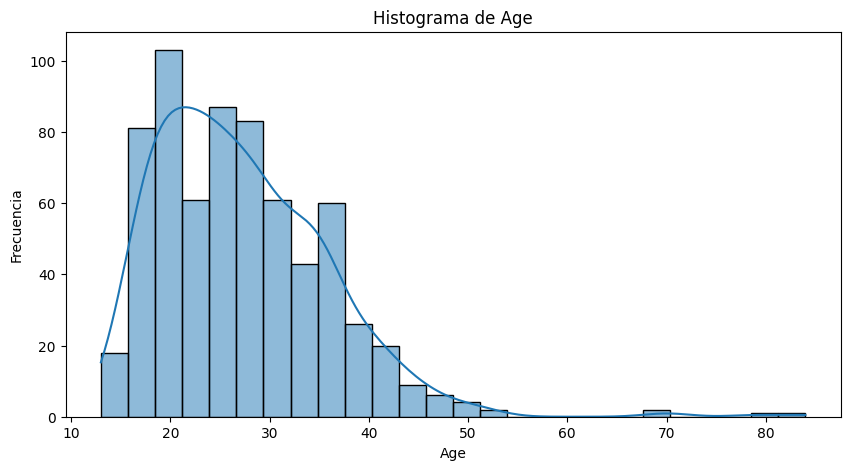

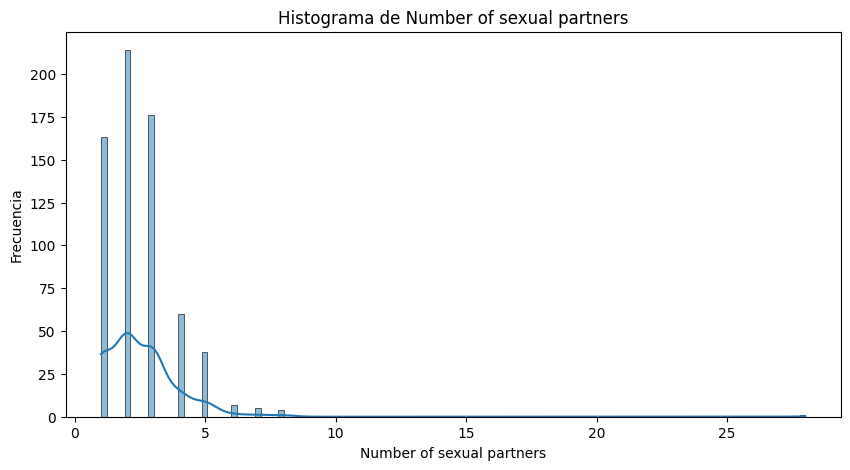

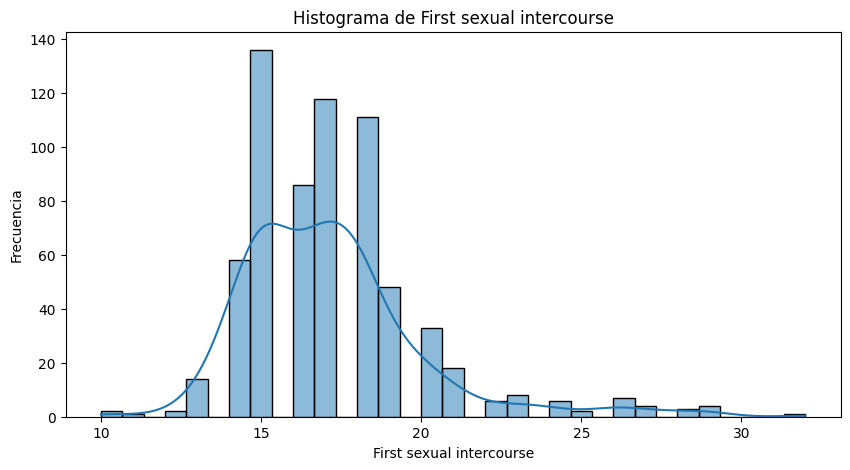

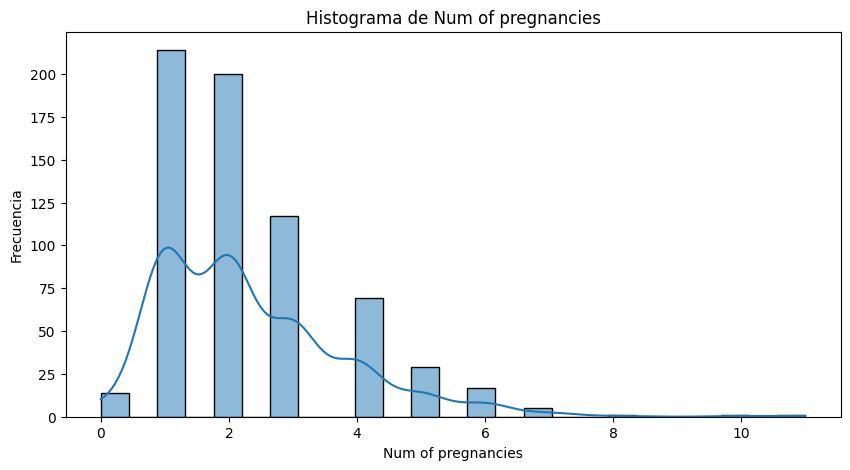

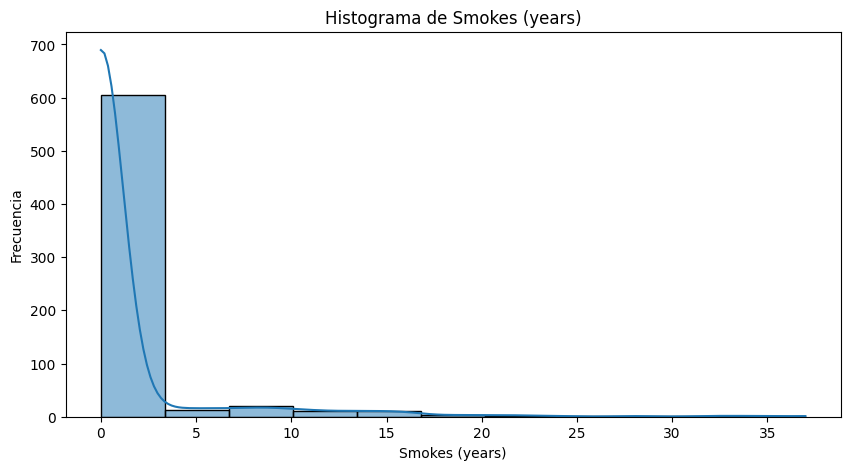

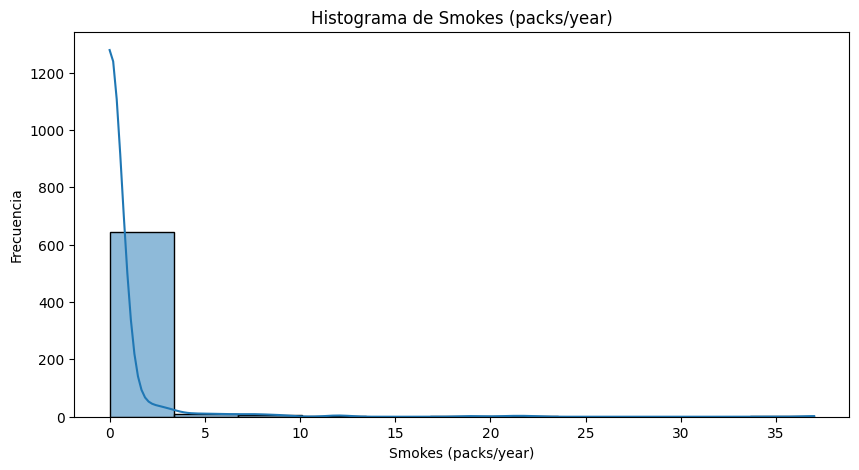

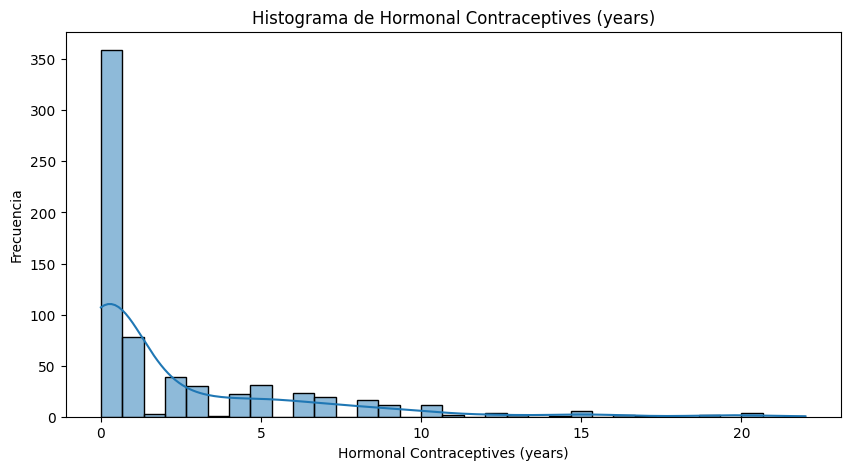

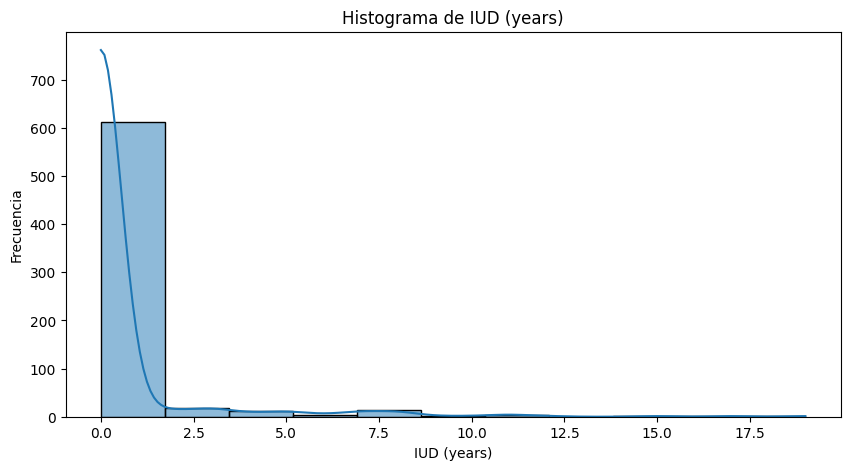

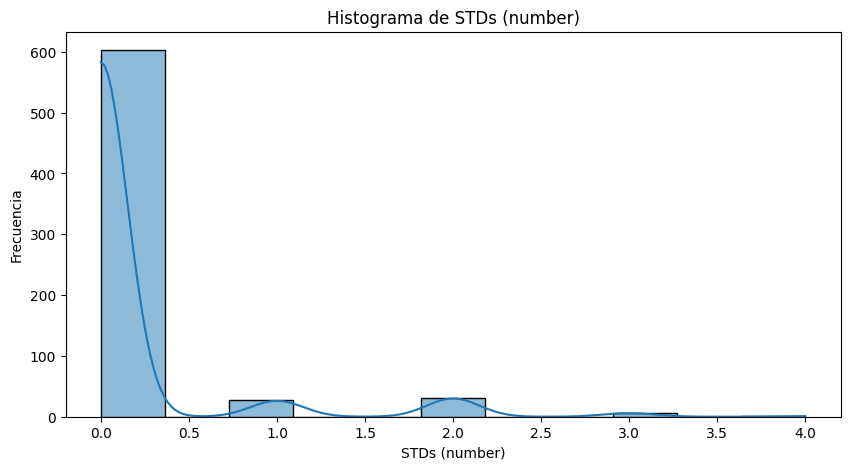

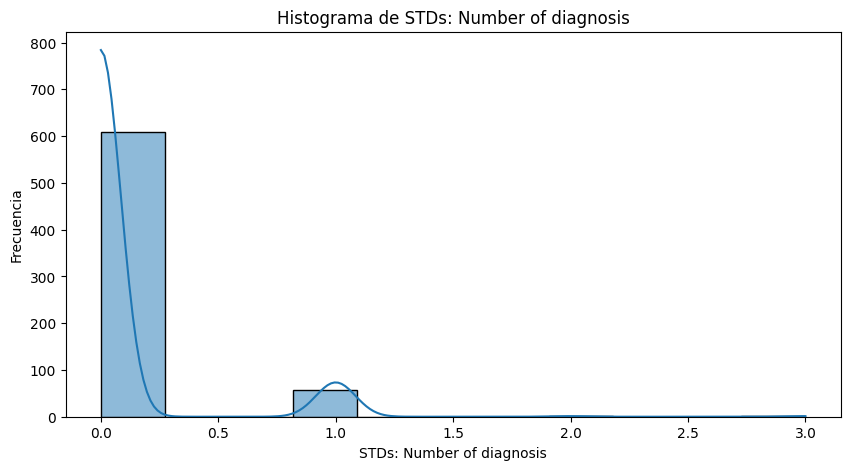

<Axes: xlabel='STDs: Number of diagnosis', ylabel='count'>

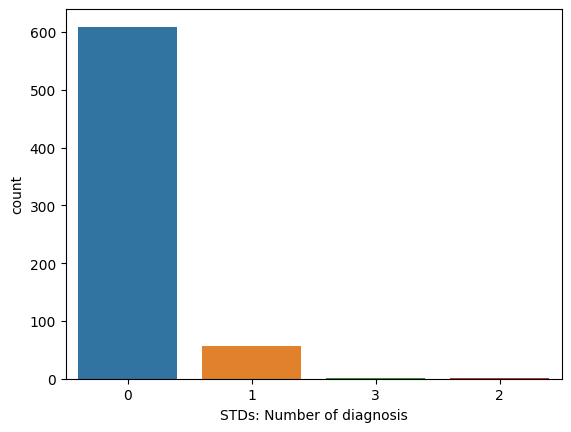

In [53]:
graph_size = (10, 5)

# Crear histogramas para variables cuantitativas
print("Variables cuantitativas:")
for var in variables_cuantitativas:
    plt.figure(figsize=graph_size)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    if len(plt.xticks()[1]) > 20:
        plt.xticks(fontsize=4, rotation=45)
    plt.ylabel('Frecuencia')
    plt.show()

# Crear gráficas de frecuencia para variables categóricas
sns.countplot(x=df[var].astype(str), hue=df[var].astype(str))


#### 4.	Aísle las variables numéricas de las categóricas, realice un análisis de correlación entre las mismas.

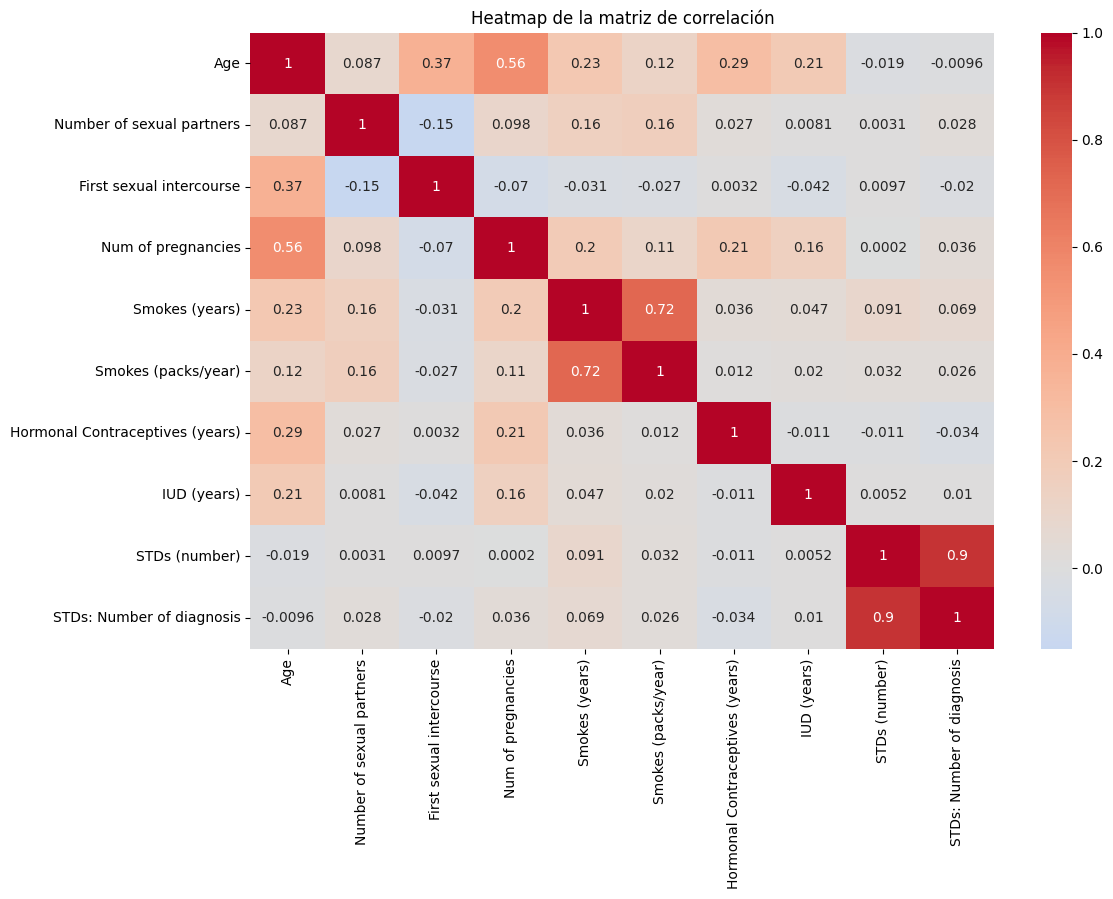

In [54]:
# Crear un DataFrame con solo las variables cuantitativas
df_cuantitativas = df[variables_cuantitativas]

# Calcular la matriz de correlación
corr_matrix = df_cuantitativas.corr()

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de la matriz de correlación')
plt.show()

#### 5.	Utilice las variables categóricas, cree tablas de frecuencia, proporción, gráficas de barras o cualquier otra técnica que le permita explorar los datos.

In [55]:
numerical_columns = [
    'Age', 
    'Number of sexual partners', 
    'First sexual intercourse', 
    'Num of pregnancies', 
    'Smokes (years)', 
    'Smokes (packs/year)', 
    'Hormonal Contraceptives (years)', 
    'IUD (years)', 
    'STDs (number)', 
    'STDs: Number of diagnosis'
]

# categorical columns should be the result of all the columns minus the numerical columns
categorical_columns = list(set(df.columns) - set(numerical_columns))
categorical_columns


['Dx:Cancer',
 'STDs:vulvo-perineal condylomatosis',
 'Hormonal Contraceptives',
 'Dx:HPV',
 'STDs:vaginal condylomatosis',
 'STDs',
 'STDs:syphilis',
 'STDs:AIDS',
 'STDs:HPV',
 'STDs:genital herpes',
 'STDs:HIV',
 'IUD',
 'Biopsy',
 'Smokes',
 'STDs:Hepatitis B',
 'STDs:pelvic inflammatory disease',
 'Schiller',
 'STDs:cervical condylomatosis',
 'STDs:molluscum contagiosum',
 'Dx:CIN',
 'STDs:condylomatosis',
 'Hinselmann',
 'Dx',
 'Citology']

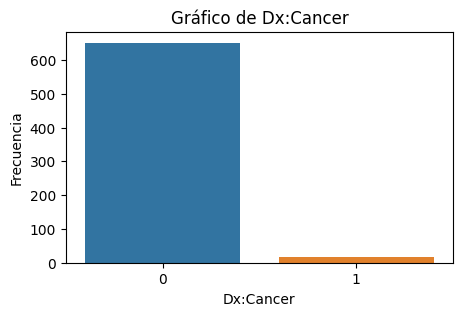

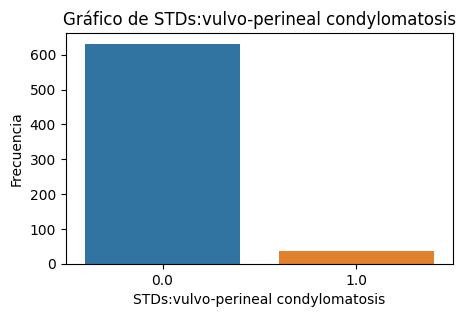

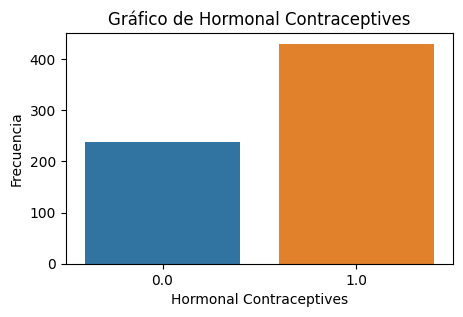

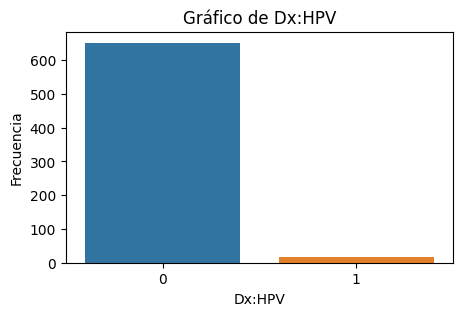

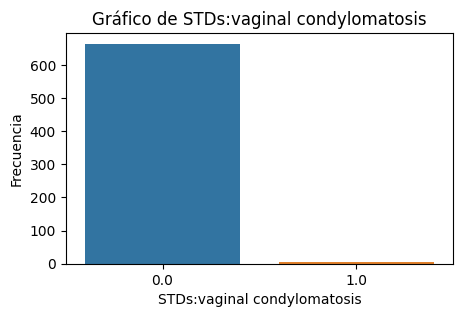

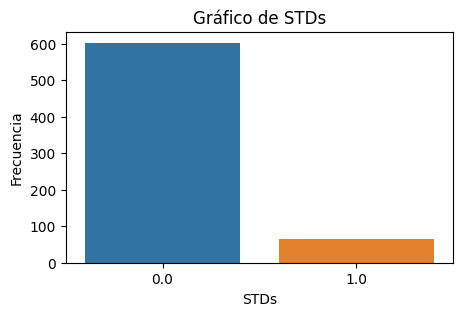

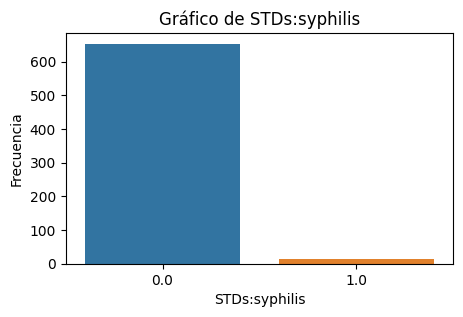

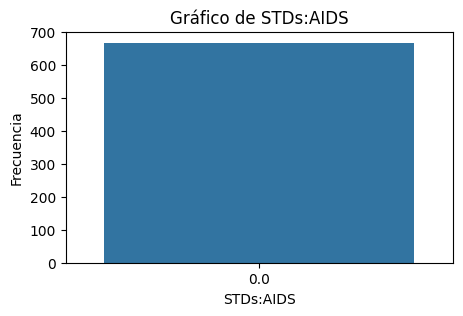

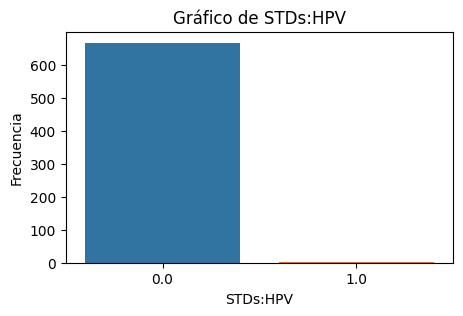

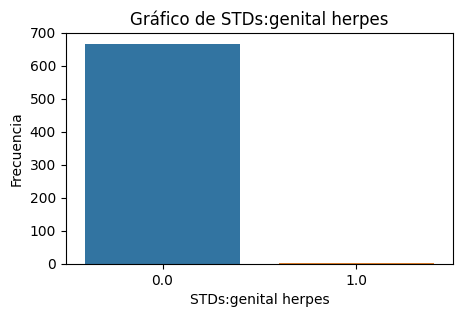

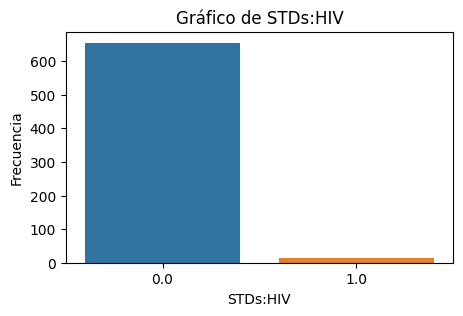

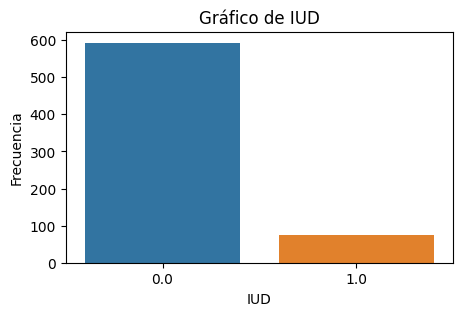

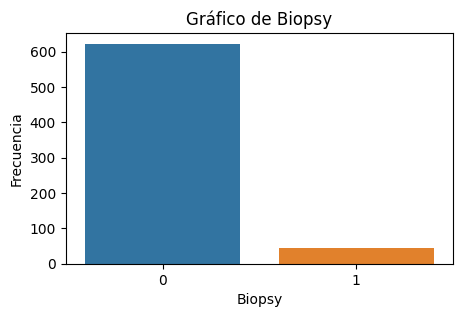

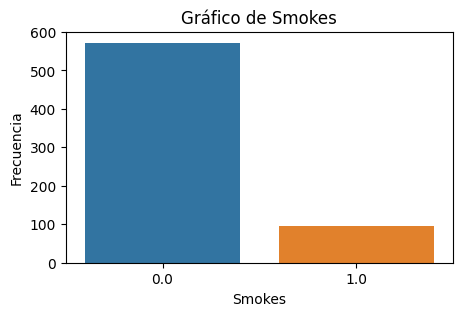

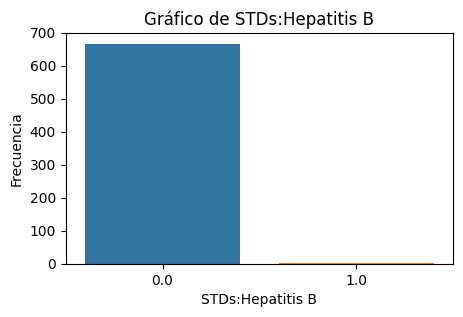

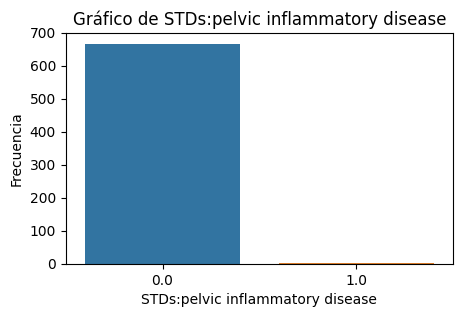

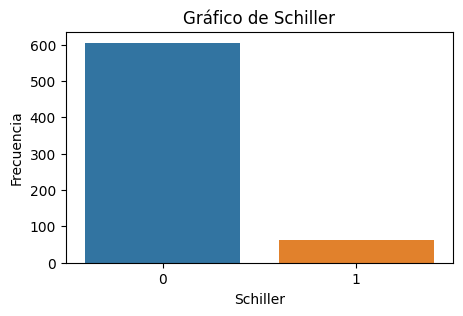

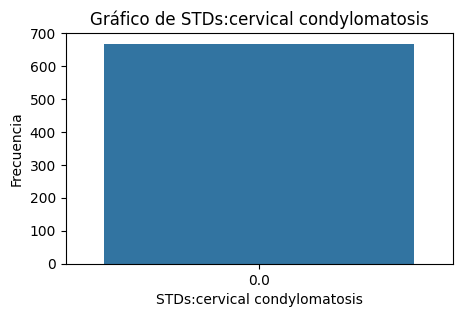

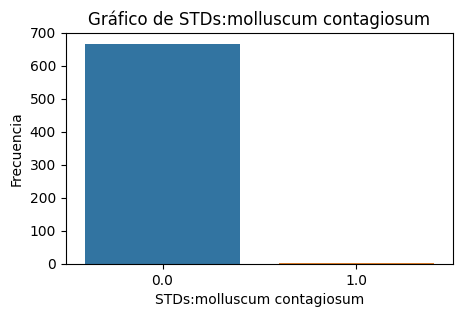

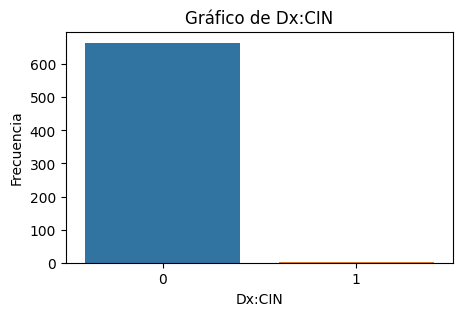

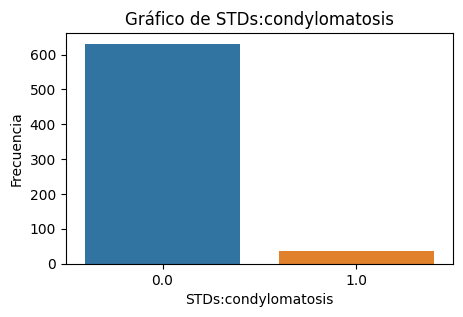

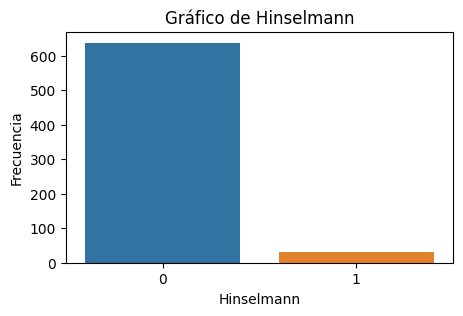

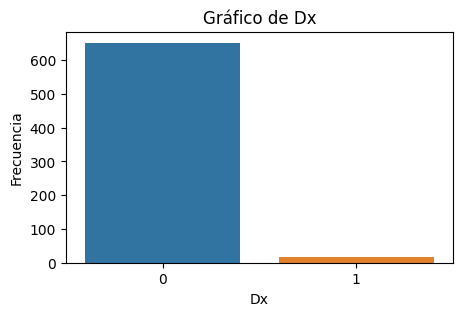

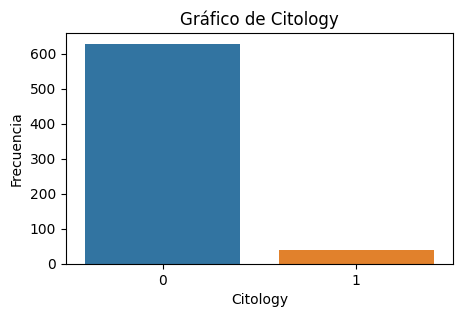

In [58]:
# Genera un gráfico de pie para cada variable categórica

for var in categorical_columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=df[var].astype(str), hue=df[var], legend=False)
    plt.title(f'Gráfico de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

#### 6.	Determine el tratamiento a seguir con los valores faltantes. Explique si necesita remover alguna variable por la cantidad de valores faltantes que tiene. ¿Es factible eliminar todos los valores faltantes de todas las variables?

La metodología utilizada en este caso, para resolver la problemática de los valores faltantes o incorrectos fue la siguiente:
1. Se eliminaron las filas que presentaban valores "?"
2. Se eliminaron las variables en las que más de la mitad de los datos eran incorrectos. 
3. Se trataron todas las celdas, intentando convertirlas en numéricas. 

Así, podemos responder a la pregunta planteada anteriormente. Fue necesario remover dos variables: 'STDs: Time since first diagnosis' y 'STDs: Time since last diagnosis'. Además de esto, se eliminaron multiples filas. 

#### 7.	Estudie si es posible hacer transformaciones en las variables categóricas para incluirlas en el PCA, ¿valdrá la pena?

Si es posible transformar las variables categóricas de modo que puedan ser incluidas en el proceso de PCA, para ello es necesario codificar las variables de modo que puedan ser tratadas de la misma forma que las variables cuantitativas. Algunas de las principales técnicas de codificación son:

* **Codificación one-hot:** Transformación esencial que crea variables binarias para cada categoría, indicando su presencia o ausencia.
* **Codificación ordinal:** Asignación de valores ordinales a las categorías, teniendo en cuenta el orden jerárquico.
* **Codificación de enteros:** Asignación de valores enteros a cada categoría.
* **Codificación de frecuencia:** Asignación de valores en función de la frecuencia de cada categoría en los datos.

(Urrego, 2020)
<br/><br/>
Para el caso del conjunto de datos con el que estamos trabajando, las variables categóricas ya se encuentran codificadas de acuerdo con la codificación *one-hot*, por lo que no es necesario hacer transformaciones adicionales para incluirlas en el PCA.
<br/><br/>
Si vale la pena incluir las variables codificadas en el PCA, debido a que pueden presentar correlación con otras variables que no son inmediatamente aparentes en un análisis de correlación. Además, el PCA puede ser útil para descartar variables categóricas que no influyen significativamente en el resultado del modelo, lo cual no es tan fácil de determinar sin un análisis más minucioso de dichas variables.

Urrego, N. (2020, 18 de mayo). Codificación de variables categóricas: Técnicas y conceptos clave. Medium. Recuperado de https://nicolasurrego.medium.com/codificaci%C3%B3n-de-variables-categ%C3%B3ricas-t%C3%A9cnicas-y-conceptos-clave-bca17b6164b2